In [4]:
import pandas as pd
import geopandas as gpd
import folium

# Load the data
data = pd.read_csv('project_data/PAS+crime+extra_final.csv')

# Example mapping of borough numbers to names
borough_mapping = {
    1: 'Barking and Dagenham', 2: 'Barnet', 3: 'Bexley', 4: 'Brent', 5: 'Bromley',
    6: 'Camden', 7: 'Croydon', 8: 'Ealing', 9: 'Enfield', 10: 'Greenwich',
    11: 'Hackney', 12: 'Hammersmith and Fulham', 13: 'Haringey', 14: 'Harrow',
    15: 'Havering', 16: 'Hillingdon', 17: 'Hounslow', 18: 'Islington',
    19: 'Kensington and Chelsea', 20: 'Kingston upon Thames', 21: 'Lambeth',
    22: 'Lewisham', 23: 'Merton', 24: 'Newham', 25: 'Redbridge', 26: 'Richmond upon Thames',
    27: 'Southwark', 28: 'Sutton', 29: 'Tower Hamlets', 30: 'Waltham Forest',
    31: 'Wandsworth', 32: 'Westminster'
}

# Map the borough numbers to names
data['Borough_Name'] = data['Borough'].map(borough_mapping)

# Aggregate shoplifting instances by borough
agg_data = data.groupby('Borough_Name')['Shoplifting'].sum().reset_index()

# Load a GeoDataFrame for London boroughs from the GeoPackage
gdf = gpd.read_file('project_data/London_Boroughs.gpkg')

# Merge aggregated data with GeoDataFrame using 'name' as the key
gdf = gdf.merge(agg_data, left_on='name', right_on='Borough_Name', how='left')

# Create a Folium map
m = folium.Map(location=[51.5074, -0.1278], zoom_start=10)

# Add boroughs to the map with color representing shoplifting instances
folium.Choropleth(
    geo_data=gdf,
    name='choropleth',
    data=gdf,
    columns=['name', 'Shoplifting'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Shoplifting Instances'
).add_to(m)

# Add layer control
folium.LayerControl().add_to(m)

# Save the map to an HTML file
m.save('london_shoplifting.html')

# Display the map inline (optional, for Jupyter Notebooks)
m


In [3]:
import pandas as pd
import geopandas as gpd

# Load the data
data = pd.read_csv('project_data/PAS+crime+extra_final.csv')

# Example mapping of borough numbers to names
borough_mapping = {
    1: 'Barking and Dagenham', 2: 'Barnet', 3: 'Bexley', 4: 'Brent', 5: 'Bromley',
    6: 'Camden', 7: 'Croydon', 8: 'Ealing', 9: 'Enfield', 10: 'Greenwich',
    11: 'Hackney', 12: 'Hammersmith and Fulham', 13: 'Haringey', 14: 'Harrow',
    15: 'Havering', 16: 'Hillingdon', 17: 'Hounslow', 18: 'Islington',
    19: 'Kensington and Chelsea', 20: 'Kingston upon Thames', 21: 'Lambeth',
    22: 'Lewisham', 23: 'Merton', 24: 'Newham', 25: 'Redbridge', 26: 'Richmond upon Thames',
    27: 'Southwark', 28: 'Sutton', 29: 'Tower Hamlets', 30: 'Waltham Forest',
    31: 'Wandsworth', 32: 'Westminster'
}

# Map the borough numbers to names
data['Borough_Name'] = data['Borough'].map(borough_mapping)

# Aggregate shoplifting instances by borough
agg_data = data.groupby('Borough_Name')['Shoplifting'].sum().reset_index()

# Load a GeoDataFrame for London boroughs from the GeoPackage
gdf = gpd.read_file('project_data/London_Boroughs.gpkg')

# Inspect the columns to find the correct column name for boroughs
print(gdf.columns)


Index(['objectid', 'name', 'gss_code', 'hectares', 'nonld_area', 'ons_inner',
       'sub_2011', 'geometry'],
      dtype='object')


In [2]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster, HeatMap

# Load the data
data = pd.read_csv('project_data/combined_crime.csv', low_memory=False)

# Check the first few rows of data to ensure it loaded correctly
print("Loaded Data:")
print(data.head())

# Filter for shoplifting instances
shoplifting_data = data[data['Crime type'].str.strip().str.lower() == 'shoplifting']

# Check the filtered data
print("Filtered Data (Shoplifting):")
print(shoplifting_data.head())

# Ensure that the filtered data is not empty
if shoplifting_data.empty:
    print("No shoplifting data found after filtering.")
else:
    # Aggregate data by location
    agg_data = shoplifting_data.groupby(['Latitude', 'Longitude']).size().reset_index(name='count')

    # Check the aggregated data
    print("Aggregated Data:")
    print(agg_data.head())

    # Check for missing or invalid coordinates
    if agg_data[['Latitude', 'Longitude']].isnull().values.any():
        print("Missing coordinates detected")
    else:
        print("No missing coordinates")

        # Create a Folium map
        m = folium.Map(location=[51.5074, -0.1278], zoom_start=10)

        # Create a marker cluster
        marker_cluster = MarkerCluster().add_to(m)

        # Add shoplifting points to the cluster
        for idx, row in agg_data.iterrows():
            if pd.notnull(row['Latitude']) and pd.notnull(row['Longitude']):
                folium.CircleMarker(
                    location=(row['Latitude'], row['Longitude']),
                    radius=5 + row['count'],  # Increase radius based on the number of cases
                    color='red',
                    fill=True,
                    fill_color='red',
                    popup=f"Shoplifting cases: {row['count']}"
                ).add_to(marker_cluster)

        # Optionally, add a heatmap for density visualization
        heat_data = [[row['Latitude'], row['Longitude']] for index, row in shoplifting_data.iterrows() if pd.notnull(row['Latitude']) and pd.notnull(row['Longitude'])]
        HeatMap(heat_data).add_to(m)

        # Save the map to an HTML file
        m.save('shoplifting_heatmap.html')

        # Display the map inline (optional, for Jupyter Notebooks)
        m

print("Map creation process complete.")


Loaded Data:
  Crime ID    Month                  Reported by                 Falls within  \
0      NaN  2010-12  Metropolitan Police Service  Metropolitan Police Service   
1      NaN  2010-12  Metropolitan Police Service  Metropolitan Police Service   
2      NaN  2010-12  Metropolitan Police Service  Metropolitan Police Service   
3      NaN  2010-12  Metropolitan Police Service  Metropolitan Police Service   
4      NaN  2010-12  Metropolitan Police Service  Metropolitan Police Service   

  Longitude   Latitude                     Location  LSOA code  \
0  0.145949  51.593914  On or near Providence Place  E01000027   
1  0.140192  51.582311       On or near Hatch Grove  E01000027   
2  0.134947  51.588063        On or near Mead Grove  E01000027   
3  0.134947  51.588063        On or near Mead Grove  E01000027   
4  0.134947  51.588063        On or near Mead Grove  E01000027   

                   LSOA name             Crime type Last outcome category  \
0  Barking and Dagenham 00

In [3]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster, HeatMap

# Load the data
data = pd.read_csv('project_data/combined_crime.csv', low_memory=False)

# Check the first few rows of data to ensure it loaded correctly
print("Loaded Data:")
print(data.head())

# Filter for shoplifting instances
shoplifting_data = data[data['Crime type'].str.strip().str.lower() == 'shoplifting']

# Check the filtered data
print("Filtered Data (Shoplifting):")
print(shoplifting_data.head())

# Ensure that the filtered data is not empty
if shoplifting_data.empty:
    print("No shoplifting data found after filtering.")
else:
    # Aggregate data by location
    agg_data = shoplifting_data.groupby(['Latitude', 'Longitude']).size().reset_index(name='count')

    # Check the aggregated data
    print("Aggregated Data:")
    print(agg_data.head())

    # Check for missing or invalid coordinates
    if agg_data[['Latitude', 'Longitude']].isnull().values.any():
        print("Missing coordinates detected")
    else:
        print("No missing coordinates")

        # Create a Folium map
        m = folium.Map(location=[51.5074, -0.1278], zoom_start=10)

        # Create a marker cluster
        marker_cluster = MarkerCluster().add_to(m)

        # Add shoplifting points to the cluster with a blue color scheme
        for idx, row in agg_data.iterrows():
            if pd.notnull(row['Latitude']) and pd.notnull(row['Longitude']):
                folium.CircleMarker(
                    location=(row['Latitude'], row['Longitude']),
                    radius=5 + row['count'],  # Increase radius based on the number of cases
                    color='blue',
                    fill=True,
                    fill_color='blue',
                    popup=f"Shoplifting cases: {row['count']}"
                ).add_to(marker_cluster)

        # Add a heatmap for density visualization with a new color gradient
        heat_data = [[row['Latitude'], row['Longitude']] for index, row in shoplifting_data.iterrows() if pd.notnull(row['Latitude']) and pd.notnull(row['Longitude'])]
        HeatMap(heat_data, gradient={0.2: 'yellow', 0.4: 'orange', 0.6: 'red', 0.8: 'darkred', 1: 'black'}).add_to(m)

        # Save the map to an HTML file
        m.save('shoplifting_heatmap_yellow_black.html')

        # Display the map inline (optional, for Jupyter Notebooks)
        m

print("Map creation process complete.")


Loaded Data:
  Crime ID    Month                  Reported by                 Falls within  \
0      NaN  2010-12  Metropolitan Police Service  Metropolitan Police Service   
1      NaN  2010-12  Metropolitan Police Service  Metropolitan Police Service   
2      NaN  2010-12  Metropolitan Police Service  Metropolitan Police Service   
3      NaN  2010-12  Metropolitan Police Service  Metropolitan Police Service   
4      NaN  2010-12  Metropolitan Police Service  Metropolitan Police Service   

  Longitude   Latitude                     Location  LSOA code  \
0  0.145949  51.593914  On or near Providence Place  E01000027   
1  0.140192  51.582311       On or near Hatch Grove  E01000027   
2  0.134947  51.588063        On or near Mead Grove  E01000027   
3  0.134947  51.588063        On or near Mead Grove  E01000027   
4  0.134947  51.588063        On or near Mead Grove  E01000027   

                   LSOA name             Crime type Last outcome category  \
0  Barking and Dagenham 00

In [6]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster, HeatMap

# Load the data
data = pd.read_csv('project_data/combined_crime.csv', low_memory=False)

# Check the first few rows of data to ensure it loaded correctly
print("Loaded Data:")
print(data.head())

# Filter for shoplifting instances
shoplifting_data = data[data['Crime type'].str.strip().str.lower() == 'shoplifting']

# Check the filtered data
print("Filtered Data (Shoplifting):")
print(shoplifting_data.head())

# Ensure that the filtered data is not empty
if shoplifting_data.empty:
    print("No shoplifting data found after filtering.")
else:
    # Aggregate data by location
    agg_data = shoplifting_data.groupby(['Latitude', 'Longitude']).size().reset_index(name='count')

    # Check the aggregated data
    print("Aggregated Data:")
    print(agg_data.head())

    # Check for missing or invalid coordinates
    if agg_data[['Latitude', 'Longitude']].isnull().values.any():
        print("Missing coordinates detected")
    else:
        print("No missing coordinates")

        # Create a Folium map
        m = folium.Map(location=[51.5074, -0.1278], zoom_start=10)

        # Create a marker cluster
        marker_cluster = MarkerCluster().add_to(m)

        # Add shoplifting points to the cluster with a green color scheme and lower opacity
        for idx, row in agg_data.iterrows():
            if pd.notnull(row['Latitude']) and pd.notnull(row['Longitude']):
                folium.CircleMarker(
                    location=(row['Latitude'], row['Longitude']),
                    radius=5 + row['count'],  # Increase radius based on the number of cases
                    color='green',
                    fill=True,
                    fill_color='green',
                    fill_opacity=0.5,  # Set lower fill opacity
                    popup=f"Shoplifting cases: {row['count']}"
                ).add_to(marker_cluster)

        # Add a heatmap for density visualization with a blue color gradient and lower opacity
        heat_data = [[row['Latitude'], row['Longitude']] for index, row in shoplifting_data.iterrows() if pd.notnull(row['Latitude']) and pd.notnull(row['Longitude'])]
        HeatMap(heat_data, gradient={0.2: 'lightblue', 0.4: 'skyblue', 0.6: 'dodgerblue', 0.8: 'blue', 1: 'darkblue'}, radius=15, blur=10, max_opacity=0.5).add_to(m)

        # Save the map to an HTML file
        m.save('shoplifting_heatmap.html')

        # Display the map inline (optional, for Jupyter Notebooks)
        m

print("Map creation process complete.")


Loaded Data:
  Crime ID    Month                  Reported by                 Falls within  \
0      NaN  2010-12  Metropolitan Police Service  Metropolitan Police Service   
1      NaN  2010-12  Metropolitan Police Service  Metropolitan Police Service   
2      NaN  2010-12  Metropolitan Police Service  Metropolitan Police Service   
3      NaN  2010-12  Metropolitan Police Service  Metropolitan Police Service   
4      NaN  2010-12  Metropolitan Police Service  Metropolitan Police Service   

  Longitude   Latitude                     Location  LSOA code  \
0  0.145949  51.593914  On or near Providence Place  E01000027   
1  0.140192  51.582311       On or near Hatch Grove  E01000027   
2  0.134947  51.588063        On or near Mead Grove  E01000027   
3  0.134947  51.588063        On or near Mead Grove  E01000027   
4  0.134947  51.588063        On or near Mead Grove  E01000027   

                   LSOA name             Crime type Last outcome category  \
0  Barking and Dagenham 00

In [ ]:
import dash
import dash_core_components as dcc
from dash import html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd

# Load the data
data = pd.read_csv('project_data/combined_crime.csv', low_memory=False)

# Extract year from the 'Month' column
data['Year'] = pd.to_datetime(data['Month'], format='%Y-%m').dt.year

# Filter for shoplifting instances
shoplifting_data = data[data['Crime type'].str.strip().str.lower() == 'shoplifting']

# Initialize the Dash app
app = dash.Dash(__name__, external_stylesheets=['https://codepen.io/chriddyp/pen/bWLwgP.css'])

app.layout = html.Div([
    html.H1("Shoplifting Incidents in London"),
    dcc.Dropdown(
        id='year-dropdown',
        options=[{'label': str(year), 'value': year} for year in sorted(shoplifting_data['Year'].unique())],
        value=sorted(shoplifting_data['Year'].unique())[0],
        clearable=False
    ),
    dcc.Graph(id='map-graph')
])

@app.callback(
    Output('map-graph', 'figure'),
    Input('year-dropdown', 'value')
)
def update_map(selected_year):
    filtered_data = shoplifting_data[shoplifting_data['Year'] == selected_year]

    # Aggregate data by location
    agg_data = filtered_data.groupby(['Latitude', 'Longitude']).size().reset_index(name='count')

    fig = px.scatter_mapbox(
        agg_data,
        lat='Latitude',
        lon='Longitude',
        size='count',
        color_continuous_scale='Viridis',
        size_max=15,
        zoom=10,
        mapbox_style="carto-positron",
        title=f"Shoplifting Incidents in {selected_year}",
        labels={'count': 'Number of Incidents'}
    )

    return fig

if __name__ == '__main__':
    app.run_server(debug=True)


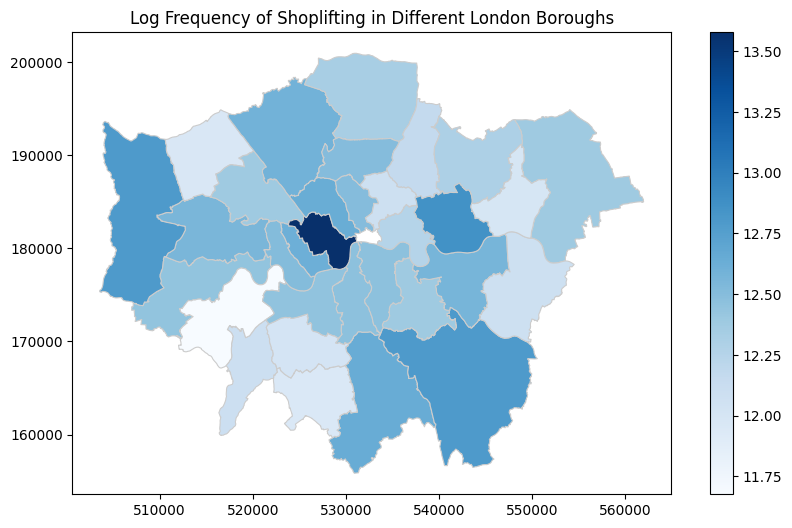

In [6]:
# RUN
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt


# Load the data
data = pd.read_csv('project_data/PAS+crime+extra_final.csv')

# Example mapping of borough numbers to names
borough_mapping = {
    1: 'Barking and Dagenham', 2: 'Barnet', 3: 'Bexley', 4: 'Brent', 5: 'Bromley',
    6: 'Camden', 7: 'Croydon', 8: 'Ealing', 9: 'Enfield', 10: 'Greenwich',
    11: 'Hackney', 12: 'Hammersmith and Fulham', 13: 'Haringey', 14: 'Harrow',
    15: 'Havering', 16: 'Hillingdon', 17: 'Hounslow', 18: 'Islington',
    19: 'Kensington and Chelsea', 20: 'Kingston upon Thames', 21: 'Lambeth',
    22: 'Lewisham', 23: 'Merton', 24: 'Newham', 25: 'Redbridge', 26: 'Richmond upon Thames',
    27: 'Southwark', 28: 'Sutton', 29: 'Tower Hamlets', 30: 'Waltham Forest',
    31: 'Wandsworth', 32: 'Westminster'
}

# Map the borough numbers to names
data['Borough_Name'] = data['Borough'].map(borough_mapping)

# Aggregate shoplifting instances by borough
agg_data = data.groupby('Borough_Name')['Shoplifting'].sum().reset_index()

# Load a GeoDataFrame for London boroughs from the GeoPackage
gdf = gpd.read_file('project_data/London_Boroughs.gpkg')

# Merge the importance scores with the geographical information of London boroughs
merged_data = gdf.merge(agg_data, how='left', left_on='name', right_on='Borough_Name')

# Plot the spatial data with importance scores using a reversed color gradient
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged_data.plot(column='Shoplifting', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Frequency of Shoplifting in Different London Boroughs')
plt.savefig('Shoplifting_figure.png')
plt.show()


In [10]:

# RUN
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
data = pd.read_csv('project_data/PAS+crime+extra_final.csv')

# Example mapping of borough numbers to names
borough_mapping = {
    1: 'Barking and Dagenham', 2: 'Barnet', 3: 'Bexley', 4: 'Brent', 5: 'Bromley',
    6: 'Camden', 7: 'Croydon', 8: 'Ealing', 9: 'Enfield', 10: 'Greenwich',
    11: 'Hackney', 12: 'Hammersmith and Fulham', 13: 'Haringey', 14: 'Harrow',
    15: 'Havering', 16: 'Hillingdon', 17: 'Hounslow', 18: 'Islington',
    19: 'Kensington and Chelsea', 20: 'Kingston upon Thames', 21: 'Lambeth',
    22: 'Lewisham', 23: 'Merton', 24: 'Newham', 25: 'Redbridge', 26: 'Richmond upon Thames',
    27: 'Southwark', 28: 'Sutton', 29: 'Tower Hamlets', 30: 'Waltham Forest',
    31: 'Wandsworth', 32: 'Westminster'
}

# Map the borough numbers to names
data['Borough_Name'] = data['Borough'].map(borough_mapping)

# Aggregate shoplifting instances by borough
agg_data = data.groupby('Borough_Name')['Shoplifting'].sum().reset_index()

# Load a GeoDataFrame for London boroughs from the GeoPackage
gdf = gpd.read_file('project_data/London_Boroughs.gpkg')

# Merge the importance scores with the geographical information of London boroughs
merged_data = gdf.merge(agg_data, how='left', left_on='name', right_on='Borough_Name')

# Calculate the natural logarithm of shoplifting instances
merged_data['Shoplifting_Log'] = np.log(merged_data['Shoplifting'])

# Plot the spatial data with logged importance scores using a reversed color gradient
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged_data.plot(column='Shoplifting_Log', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Log Frequency of Shoplifting in Different London Boroughs')
plt.savefig('Shoplifting_log_figure.png')
plt.show()


Index(['objectid', 'name', 'gss_code', 'hectares', 'nonld_area', 'ons_inner',
       'sub_2011', 'geometry'],
      dtype='object')


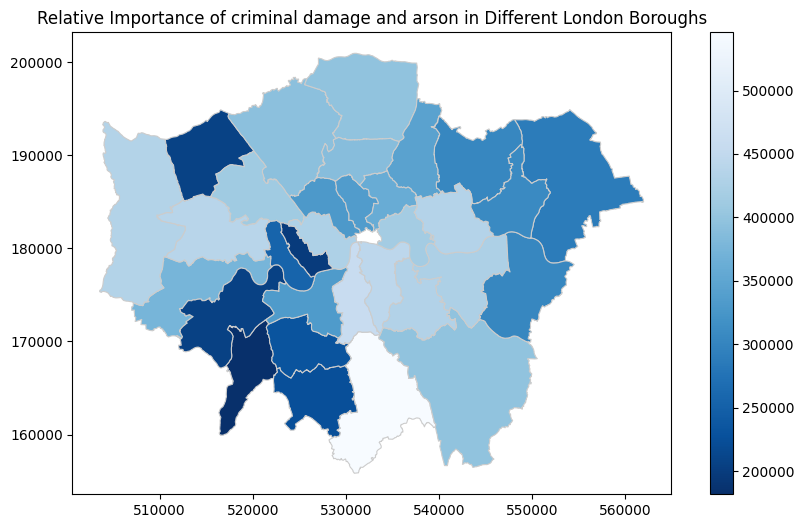

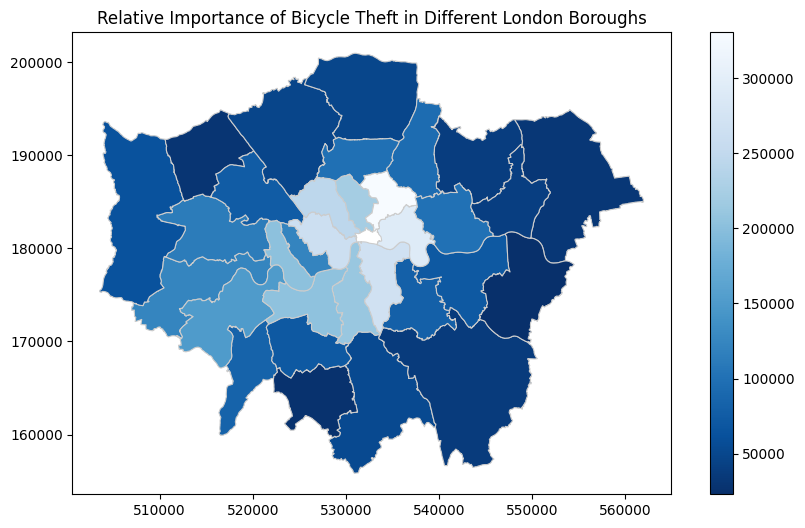

C:\Users\ambra\AppData\Local\Temp\ipykernel_2980\1812887781.py:5: DtypeWarning: Columns (0,4,5,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('project_data/combined_crime.csv')


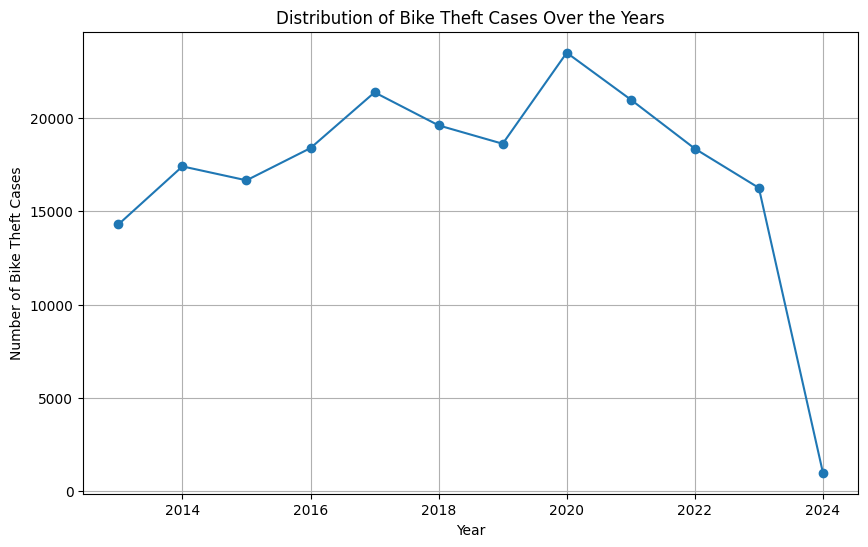

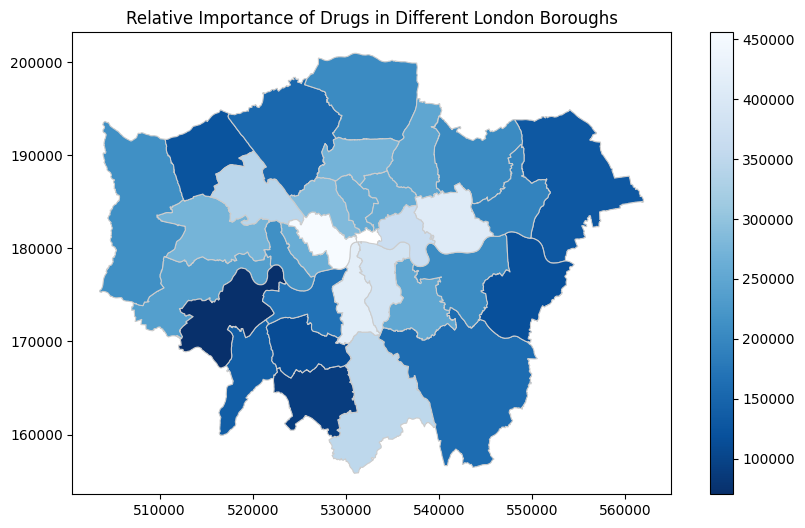

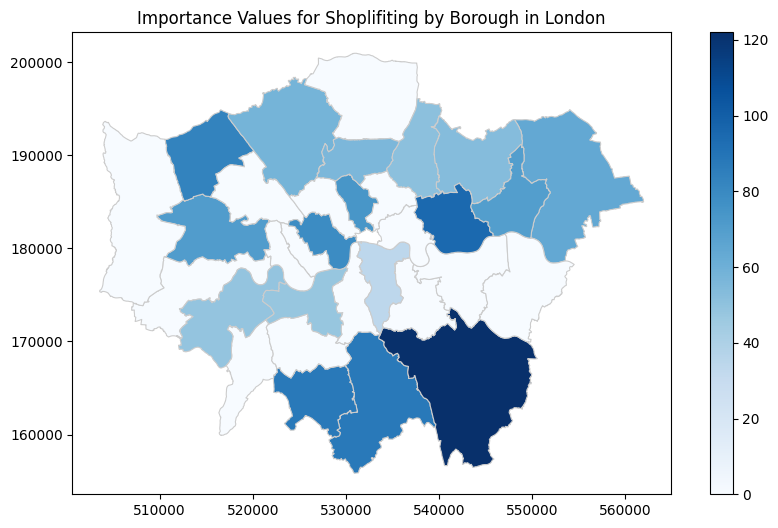

In [7]:
#RUN

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Provided dictionary
borough_data = {
    "Islington": 74,
    "Sutton": 88,
    "Bromley": 122,
    "Lewisham": 0,
    "Bexley": 0,
    "Haringey": 56,
    "Harrow": 83,
    "Enfield": 0,
    "Croydon": 88,
    "Newham": 95,
    "Barking and Dagenham": 70,
    "Havering": "54/74",
    "Redbridge": 53,
    "Southwark": 34,
    "Lambeth": 0,
    "Hounslow": 0,
    "Greenwich": 0,
    "Kingston upon Thames": 0,
    "Merton": 0,
    "Barnet": 58,
    "Richmond upon Thames": 49,
    "Hillingdon": 0,
    "Brent": 0,
    "Ealing": 71,
    "Wandsworth": 48,
    "Tower Hamlets": 0,
    "Hammersmith and Fulham": 0,
    "Westminster": 79,
    "Kensington and Chelsea": 0,
    "Waltham Forest": 51,
    "Hackney": 0,
    "Camden": 0
}

# Convert dictionary to DataFrame
borough_df = pd.DataFrame(list(borough_data.items()), columns=['Borough_Name', 'Value'])

# Convert "54/74" to the average of 54 and 74
borough_df['Value'] = borough_df['Value'].apply(lambda x: sum(map(int, x.split('/'))) / 2 if isinstance(x, str) and '/' in x else x).astype(float)

# Load a GeoDataFrame for London boroughs from the GeoPackage
gdf = gpd.read_file('project_data/London_Boroughs.gpkg')

# Merge the borough data with the geographical information of London boroughs
merged_data = gdf.merge(borough_df, how='left', left_on='name', right_on='Borough_Name')

# Plot the spatial data with values from the dictionary using a color gradient
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged_data.plot(column='Value', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Importance Values for Shoplifiting by Borough in London')
plt.savefig('Importance_values_shoplifting.png')
plt.show()


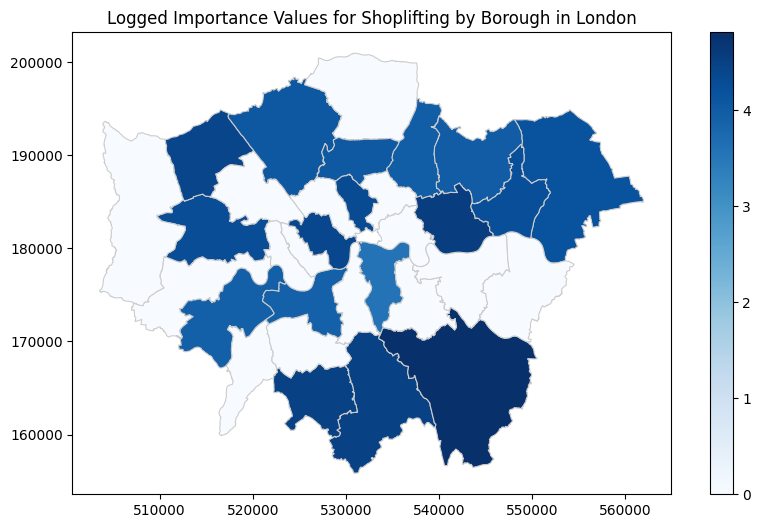

In [8]:
#RUN

import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

# Provided dictionary
borough_data = {
    "Islington": 74,
    "Sutton": 88,
    "Bromley": 122,
    "Lewisham": 0,
    "Bexley": 0,
    "Haringey": 56,
    "Harrow": 83,
    "Enfield": 0,
    "Croydon": 88,
    "Newham": 95,
    "Barking and Dagenham": 70,
    "Havering": "54/74",
    "Redbridge": 53,
    "Southwark": 34,
    "Lambeth": 0,
    "Hounslow": 0,
    "Greenwich": 0,
    "Kingston upon Thames": 0,
    "Merton": 0,
    "Barnet": 58,
    "Richmond upon Thames": 49,
    "Hillingdon": 0,
    "Brent": 0,
    "Ealing": 71,
    "Wandsworth": 48,
    "Tower Hamlets": 0,
    "Hammersmith and Fulham": 0,
    "Westminster": 79,
    "Kensington and Chelsea": 0,
    "Waltham Forest": 51,
    "Hackney": 0,
    "Camden": 0
}

# Convert dictionary to DataFrame
borough_df = pd.DataFrame(list(borough_data.items()), columns=['Borough_Name', 'Value'])

# Convert "54/74" to the average of 54 and 74
borough_df['Value'] = borough_df['Value'].apply(lambda x: sum(map(int, x.split('/'))) / 2 if isinstance(x, str) and '/' in x else x).astype(float)

# Apply a logarithmic transformation to the values
borough_df['Logged_Value'] = np.log1p(borough_df['Value'])  # Logarithm with base e (natural logarithm)

# Load a GeoDataFrame for London boroughs from the GeoPackage
gdf = gpd.read_file('project_data/London_Boroughs.gpkg')

# Merge the borough data with the geographical information of London boroughs
merged_data = gdf.merge(borough_df, how='left', left_on='name', right_on='Borough_Name')

# Plot the spatial data with logged values using a color gradient
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
merged_data.plot(column='Logged_Value', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Logged Importance Values for Shoplifting by Borough in London')
plt.savefig('Logged_importance_values_shoplifting.png')
plt.show()
